# PCA 

### What PCA Actually Does

PCA reduces dimensionality by finding **n_components** directions (principal components) of greatest variance. These directions (vectors) are **linear combinations** of your original features, not individual m/z channels.

### Key Distinction

In your mass spec context:
- **Input features**: Individual m/z channels (e.g., m/z 100, 101, 102, etc.)
- **Principal components**: Weighted combinations of ALL m/z channels


In [32]:
import numpy as np
import matplotlib.pyplot as plt

X = np.load("../Data/LPS/control1_x.npy")

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 10  # Choose number of components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)
X_reconstructed_original_scale = scaler.inverse_transform(X_reconstructed)

 
pca_loss_mse = mean_squared_error(X_scaled, X_reconstructed)   
pca_loss_mae = mean_absolute_error(X_scaled, X_reconstructed)   
pca_loss_rmse = root_mean_squared_error(X_scaled, X_reconstructed)   


In [ ]:
print(f'MSE: {pca_loss_mse}')
print(f'MAE: {pca_loss_mae}')
print(f'RMSE: {pca_loss_rmse}')


MSE: 0.5523863770579271
MAE: 0.0618187076315624
RMSE: 0.5566308614192438


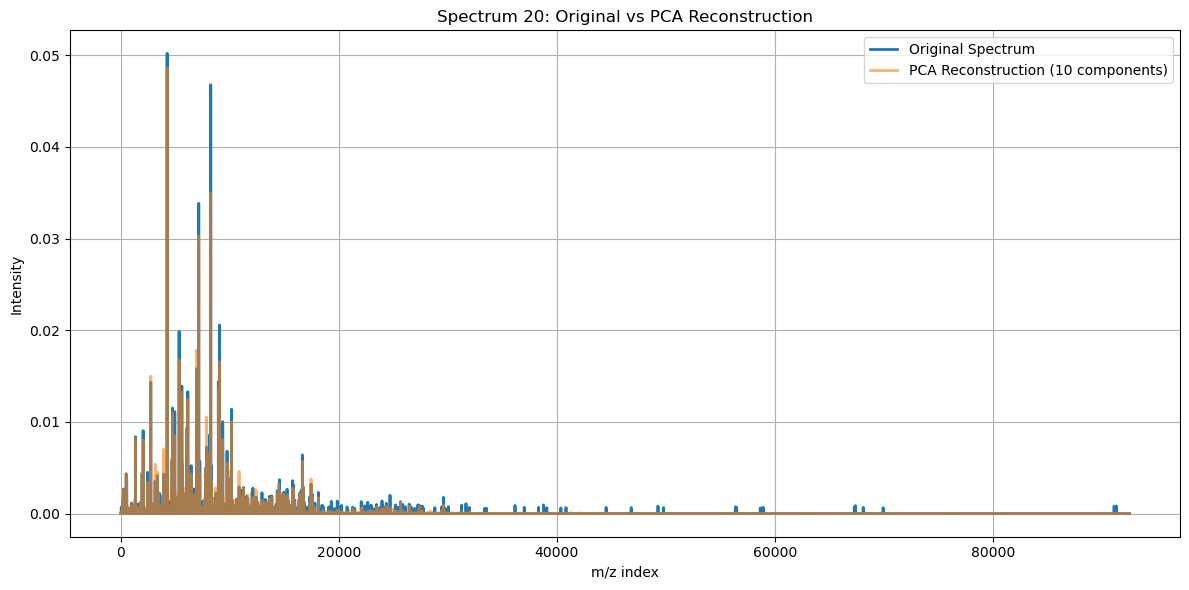

Reconstruction error for spectrum 20: 0.000000


In [39]:
spectrum_idx = 20  

plt.figure(figsize=(12, 6))
plt.plot(X[spectrum_idx], label='Original Spectrum', linewidth=2)
plt.plot(X_reconstructed_original_scale[spectrum_idx], label=f'PCA Reconstruction ({n_components} components)', linewidth=2, alpha=0.6)
plt.xlabel('m/z index')
plt.ylabel('Intensity')
plt.title(f'Spectrum {spectrum_idx}: Original vs PCA Reconstruction')
plt.legend()
plt.grid(True, alpha=1)
plt.tight_layout()
plt.show()

# Calculate and display the reconstruction error for this specific spectrum
spectrum_error = mean_squared_error(X[spectrum_idx:spectrum_idx+1], X_reconstructed_original_scale[spectrum_idx:spectrum_idx+1])
print(f"Reconstruction error for spectrum {spectrum_idx}: {spectrum_error:.6f}")

In [40]:
print(X.shape)
print(X_pca.shape)
print(pca.components_[0].shape)

(1636, 92500)
(1636, 10)
(92500,)


In [45]:
# Print individual variance contribution of each PC
print("Individual Principal Component Analysis:")
print("=" * 50)

for i in range(n_components):
    var_ratio = pca.explained_variance_ratio_[i]
    var_value = pca.explained_variance_[i]
    print(f"PC{i+1}:")
    print(f"  Explained Variance: {var_value:.6f}")
    print(f"  Explained Variance Ratio: {var_ratio:.6f} ({var_ratio*100:.2f}%)")
    print()

print(f"Total variance explained by {n_components} components: {pca.explained_variance_ratio_.sum():.6f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")


Individual Principal Component Analysis:
PC1:
  Explained Variance: 173.167859
  Explained Variance Ratio: 0.003329 (0.33%)

PC2:
  Explained Variance: 130.235202
  Explained Variance Ratio: 0.002504 (0.25%)

PC3:
  Explained Variance: 84.041711
  Explained Variance Ratio: 0.001616 (0.16%)

PC4:
  Explained Variance: 79.630949
  Explained Variance Ratio: 0.001531 (0.15%)

PC5:
  Explained Variance: 76.243511
  Explained Variance Ratio: 0.001466 (0.15%)

PC6:
  Explained Variance: 71.209631
  Explained Variance Ratio: 0.001369 (0.14%)

PC7:
  Explained Variance: 69.761791
  Explained Variance Ratio: 0.001341 (0.13%)

PC8:
  Explained Variance: 69.501023
  Explained Variance Ratio: 0.001336 (0.13%)

PC9:
  Explained Variance: 68.403984
  Explained Variance Ratio: 0.001315 (0.13%)

PC10:
  Explained Variance: 66.929969
  Explained Variance Ratio: 0.001287 (0.13%)

Total variance explained by 10 components: 0.017093 (1.71%)
